In [125]:
import cv2
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
img_name = './After2.png'
image = cv2.imread(img_name)



## FIND ENTROY IMAGE ##

True

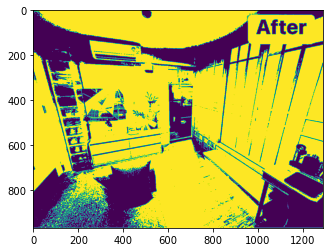

In [126]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
cv2.imwrite('image_thres1_'+'After2'+'.jpg', thresh)

## FIND VOLUME IN IMAGE ##

In [127]:
def entroy_many_factor_e_solid (area_solid, area_total):
     return (-1*(area_solid / area_total)) * (np.log2(area_solid / area_total ))

def entroy_many_factor_e_void(area_solid, area_total):
     area_void = area_total - area_solid
     return (-1*(area_void/ area_total)) * (np.log2(area_void / area_total))

def sum_of_solid_and_void (e_solid, e_void):
     return e_solid + e_void


h =>  968
w =>  1290
all volumns =>  1248720
inuse => 878060
value_entroy =>  0.8773837610579844


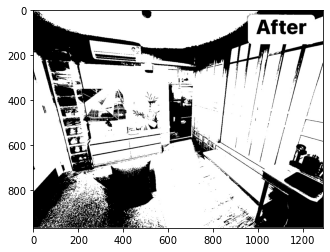

In [128]:
resize_img = cv2.imread('./image_thres1_After2.jpg')
plt.imshow(resize_img)

height_image_bit = resize_img.shape[0]
width_image_bit = resize_img.shape[1]

print("h => ",height_image_bit)
print("w => ",width_image_bit)
print("all volumns => ",width_image_bit * height_image_bit)
total_vol_image= width_image_bit * height_image_bit
counting_white = 0

for i in range(height_image_bit):
        for j in range(width_image_bit):
                set_img = resize_img[i, j]
                r_c = set_img[0]
                g_c = set_img[1]
                b_c = set_img[2]
                if r_c >= 200 and g_c >= 200 and b_c >= 200:
                        counting_white += 1

e_solid = entroy_many_factor_e_solid(counting_white, total_vol_image)
e_void = entroy_many_factor_e_void(counting_white, total_vol_image) 
value_entroy = sum_of_solid_and_void(e_solid=e_solid,e_void=e_void)
print("inuse =>", counting_white)
print("value_entroy => ", value_entroy)




## ver 1 ##
# h =>  968
# w =>  1290
# all volumns =>  1248720
# inuse => 414828
# value_entroy =>  0.9171609233450513

# h =>  968
# w =>  1290
# all volumns =>  1248720
# inuse => 370660
# value_entroy =>  0.8773837610579844



## ver 2 shade based at threshold = 100 ## 
# before #
# h =>  968
# w =>  1290
# all volumns =>  1248720
# inuse => 833892
# value_entroy =>  0.9171609233450513

# After # 
# h =>  968
# w =>  1290
# all volumns =>  1248720
# inuse => 878060
# value_entroy =>  0.8773837610579844


## ver2 at threshold = 100 ##

# before # 
# h =>  1724
# w =>  1290
# all volumns =>  2223960
# inuse => 1467405
# value_entroy =>  0.9249944099417984

# after #
# Standard Deviation 51
# h =>  968
# w =>  1290
# all volumns =>  1248720
# inuse => 893368
# value_entroy =>  0.8616072669559971


## SD OF IMAGE ##

In [85]:
# resize_img_sd = cv2.resize(image, (1024,720), interpolation=cv2.INTER_NEAREST)
resize_img_sd = image
height_resize_img_sd = resize_img_sd.shape[0]
weight_resize_img_sd = resize_img_sd.shape[1]

list_of_pixel_img = []

for i in range(height_resize_img_sd):
    for j in range(weight_resize_img_sd):
        set_rgb_img = resize_img_sd[i, j]
        avg_pixel = stats.trim_mean(set_rgb_img,0)
        list_of_pixel_img.append(avg_pixel)
        

trim_of_mean = round(stats.tstd(list_of_pixel_img))
print("Standard Deviation",trim_of_mean)

Standard Deviation 51


## SHAPE OF OBJECT ##

True

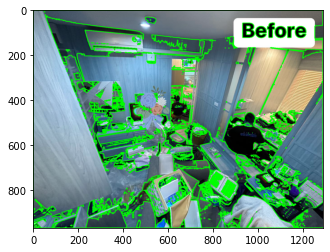

In [70]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image_copy)
cv2.imwrite('contours_none_image1.jpg', image_copy)
